In [1]:
from __future__ import division
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/US_database/"
symbols = ['SPY', 'TLT', 'DBC', 'SHY', 'GLD']

In [3]:
def return_daily_data(year):
    data_list = []
    for symbol in symbols:
        data = pd.read_csv(path + symbol + '.csv')
        data.index = data['Date']
        data = data[str(year) + '-01-01':str(year) + '-12-31']
        data = data['Adj Close']
        data = data.pct_change()[1:]
        data_list.append(data)
        price_data = pd.DataFrame(data_list)
        price_data = price_data.transpose()
    return price_data

In [4]:
def cov_matrix(year):
    data_list = []
    for symbol in symbols:
        data = pd.read_csv(path + symbol + '.csv')
        data.index = data['Date']
        data = data[str(year) + '-01-01':str(year) + '-12-31']
        data = data['Adj Close']
        data = data.pct_change()[1:]
        data_list.append(data)
        price_data = np.array(data_list)
    cov_matrix_year = np.cov(price_data)
    return cov_matrix_year

In [5]:
def calculate_portfolio_var(w,V):
    w = np.matrix(w)
    return (w*V*w.T)[0,0]

def calculate_risk_contribution(w,V):
    w = np.matrix(w)
    sigma = np.sqrt(calculate_portfolio_var(w,V))
    MRC = V*w.T
    RC = np.multiply(MRC,w.T)/sigma
    return RC

In [6]:
def risk_budget_objective(x,pars):
    V = pars[0]
    x_t = pars[1]
    sig_p =  np.sqrt(calculate_portfolio_var(x,V))
    risk_target = np.asmatrix(np.multiply(sig_p,x_t))
    asset_RC = calculate_risk_contribution(x,V)
    J = sum(np.square(asset_RC-risk_target.T))[0,0]
    return J

def total_weight_constraint(x):
    return np.sum(x)-1.0

def long_only_constraint(x):
    return x

In [7]:
def risk_parity_weights(year):
    w0 = [1/5]*5
    x_t = [1/5]*5
    V = cov_matrix(year)
    cons = ({'type': 'eq', 'fun': total_weight_constraint},
            {'type': 'ineq', 'fun': long_only_constraint})
    res= minimize(risk_budget_objective, w0, args=[V,x_t], method='SLSQP',constraints=cons, options={'disp': True, 'ftol':1e-12})
    weight = list(res.x)
    a = np.asmatrix(res.x)
    return weight

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.5026146361984336e-13
            Iterations: 55
            Function evaluations: 387
            Gradient evaluations: 55
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.92007446353977e-13
            Iterations: 43
            Function evaluations: 303
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.72113782776719e-13
            Iterations: 46
            Function evaluations: 326
            Gradient evaluations: 46
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.736902786542312e-14
            Iterations: 43
            Function evaluations: 304
            Gradient evaluations: 43
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.9665772971570615e-13
            Iterations: 49


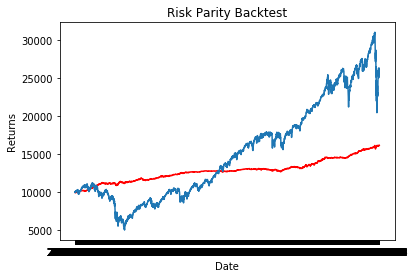

In [8]:
for i in range(2007, 2021):
    price_data = []
    if i<=2007:
        base_fund = 10000
    else:
        base_fund = total_return[-1]
    total_return = ((((risk_parity_weights(i)*return_daily_data(i)).sum(axis=1))+1).cumprod())*base_fund
    plt.plot(total_return, color='r')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Risk Parity Backtest')

price_data1 = pd.read_csv("/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/US_database/SPY.csv", engine='python')
price_data1.index = price_data1['Date']
price_data1 = price_data1['2007-01-01':'2020-04-28']
price_data1 = price_data1['Adj Close']
returns_data1 = price_data1.pct_change()[1:]
cumulative_returns1 = (returns_data1+1).cumprod()
base_fund = 10000
returns1 = (cumulative_returns1 * base_fund)
returns1.plot()
# plt.plot(returns1)
# plt.show()